# MINI PROJECT (NBA GAME STATISTICS)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Importing and cleaning of Datasets

In [ ]:
df_nba = pd.read_csv("./Dataset/games.csv")
df_nba.columns = df_nba.columns.str.replace("_"," ")
df_nba["HOME TEAM WINS"]  = df_nba["HOME TEAM WINS"].map({0: False, 1: True})
print(df_nba.dtypes)

In [ ]:
df_nba.info()

In [ ]:
win = df_nba['HOME TEAM WINS'].to_frame()
print(win["HOME TEAM WINS"].value_counts())

In [ ]:

sns.catplot(y = "HOME TEAM WINS", data = win, kind = "count")

As we are looking at the factors that primarily help the home team win, we will start by removing some columns from the data frame. The columns that we'll remove from the data frame are as follows: 
1. GAME DATE EST
2. GAME ID
3. GAME STATUS TEXT
4. HOME TEAM ID
5. VISITOR TEAM ID
6. SEASON
7. TEAM ID home
8. TEAM ID away

In [ ]:
cleanDF_nba=df_nba.drop(['GAME DATE EST','GAME ID', 'GAME STATUS TEXT', 'HOME TEAM ID', 'VISITOR TEAM ID', 'SEASON', 'TEAM ID home', 'TEAM ID away'],axis=1)
cleanDF_nba.dropna()

Now that we have cleaned the data and obtained the data required, we can get started on exploratory data analysis and visualization. We will primarily be focusing on the following data and its effect on the categorical variable HOME TEAM WINS:
1. FG PCT Home
2. FT PCT Home
3. AST Home
4. REB Home

## Exploratory Data Analysis

In [ ]:
fg_rate = cleanDF_nba['FG PCT home'].to_frame()
ft_rate = cleanDF_nba['FT PCT home'].to_frame()
ast_count =cleanDF_nba['AST home'].to_frame()
reb_count = cleanDF_nba['REB home'].to_frame()

In [ ]:
# Plot the distributions of fg_rate
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = fg_rate, orient = "h", ax = axes[0])
sns.histplot(data = fg_rate, ax = axes[1])
sns.violinplot(data = fg_rate, orient = "h", ax = axes[2])


In [ ]:
# Create a joint dataframe of field goal rate with win rate
newDF1 = pd.concat([fg_rate, win], axis = 1).reindex(fg_rate.index)

# Joint boxplot 
f = plt.figure(figsize=(18, 6))
sns.boxplot(x = "FG PCT home", y = "HOME TEAM WINS", data = newDF1, orient = "h")
plt.plot()


In [ ]:
# Plot the distributions of ft_rate
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = ft_rate, orient = "h", ax = axes[0])
sns.histplot(data = ft_rate, ax = axes[1])
sns.violinplot(data = ft_rate, orient = "h", ax = axes[2])

In [ ]:
# Create a joint dataframe of free throw rate with win rate
newDF2 = pd.concat([ft_rate, win], axis = 1).reindex(ft_rate.index)

# Joint boxplot 
f = plt.figure(figsize=(18, 6))
sns.boxplot(x = "FT PCT home", y = "HOME TEAM WINS", data = newDF2, orient = "h")
plt.plot()

In [ ]:
# Plot the distributions of ast_count
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = ast_count, orient = "h", ax = axes[0])
sns.histplot(data = ast_count, ax = axes[1])
sns.violinplot(data = ast_count, orient = "h", ax = axes[2])

In [ ]:
# Create a joint dataframe of number of assist with win rate
newDF3 = pd.concat([ast_count, win], axis = 1).reindex(fg_rate.index)

# Joint boxplot 
f = plt.figure(figsize=(18, 6))
sns.boxplot(x = "AST home", y = "HOME TEAM WINS", data = newDF3, orient = "h")
plt.plot()

In [ ]:
# Plot the distributions of reb_count
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = reb_count, orient = "h", ax = axes[0])
sns.histplot(data = reb_count, ax = axes[1])
sns.violinplot(data = reb_count, orient = "h", ax = axes[2])

In [ ]:
# Create a joint dataframe of number of rebounds with win rate
newDF4 = pd.concat([reb_count, win], axis = 1).reindex(fg_rate.index)

# Joint boxplot 
f = plt.figure(figsize=(18, 6))
sns.boxplot(x = "REB home", y = "HOME TEAM WINS", data = newDF4, orient = "h")
plt.plot()

Inputs/ analysis for which variable seems better

## Classification tree fitting

In [ ]:
X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.DataFrame
y_test: pd.DataFrame
X_train, X_test, y_train, y_test = train_test_split(newDF1["FG PCT home"].to_frame(), newDF1["HOME TEAM WINS"].to_frame(), test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

In [ ]:
f = plt.figure(figsize=(48,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Lost","Win"])

In [ ]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

## Exploratory Data Analysis

<Axes: >

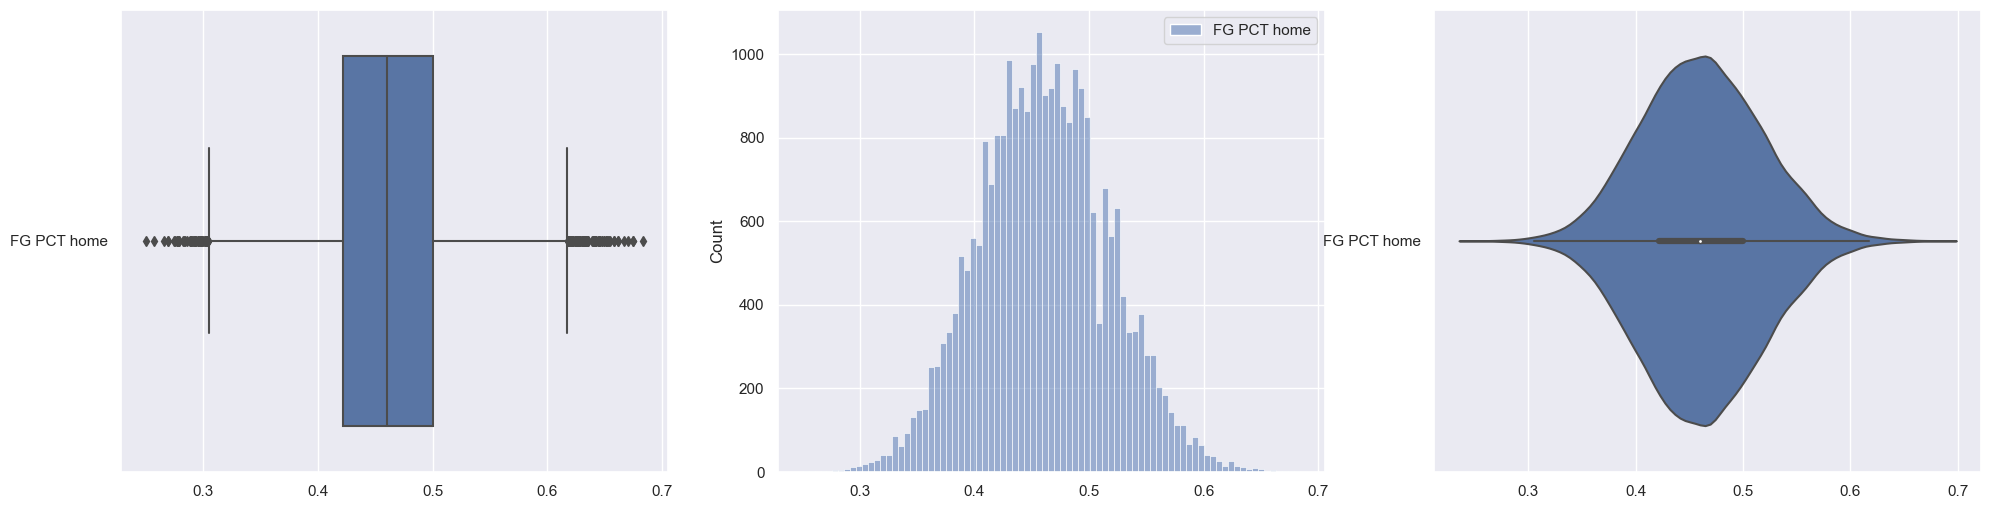

In [92]:
# Plot the distributions of fg_rate
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = fg_rate, orient = "h", ax = axes[0])
sns.histplot(data = fg_rate, ax = axes[1])
sns.violinplot(data = fg_rate, orient = "h", ax = axes[2])


<Axes: >

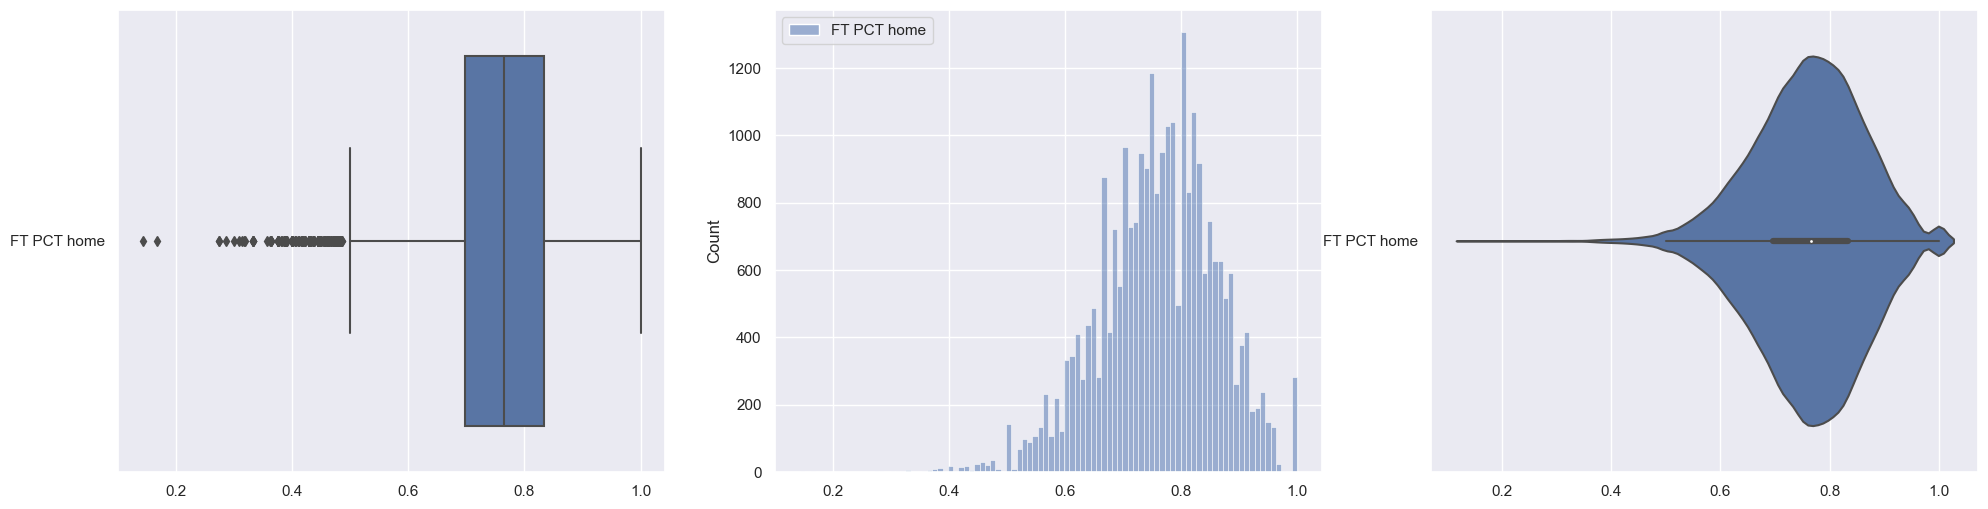

In [ ]:
# Plot the distributions of ft_rate
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = ft_rate, orient = "h", ax = axes[0])
sns.histplot(data = ft_rate, ax = axes[1])
sns.violinplot(data = ft_rate, orient = "h", ax = axes[2])

<Axes: >

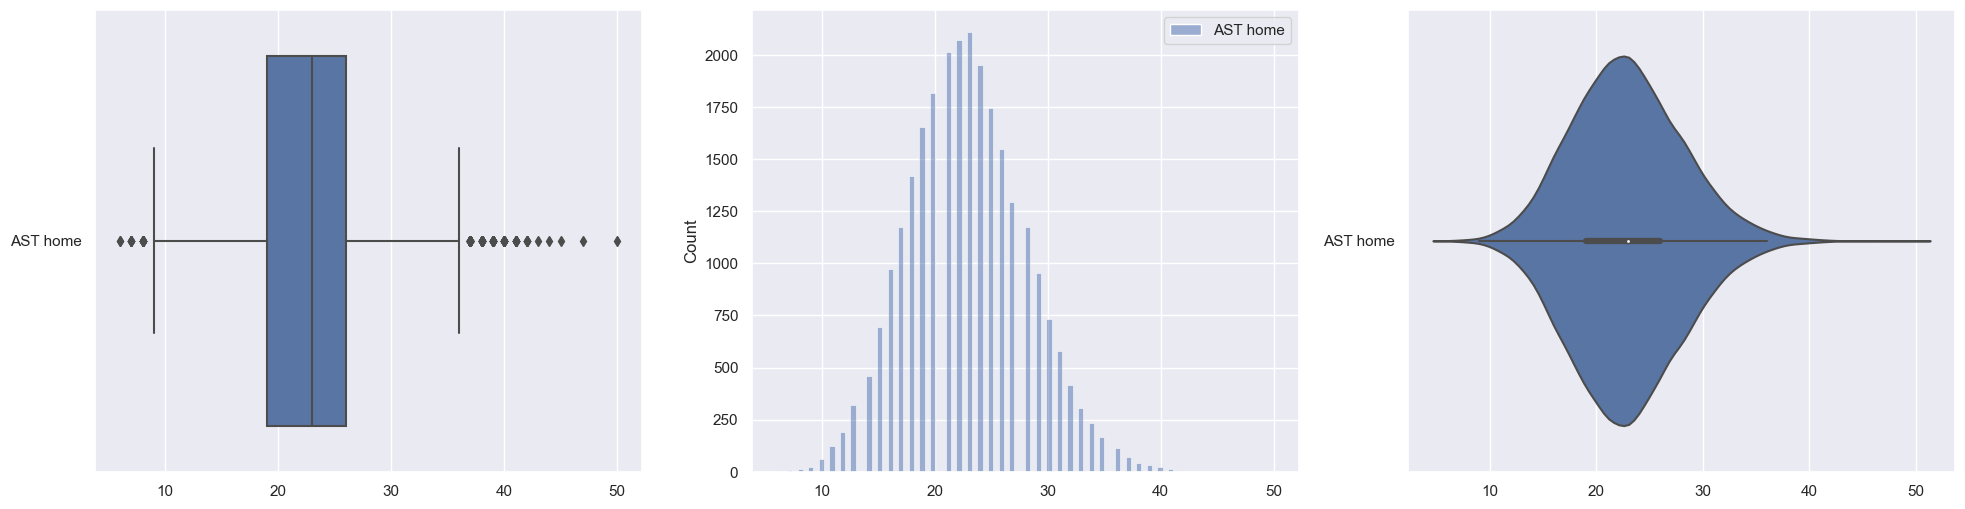

In [64]:
# Plot the distributions of ast_count
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = ast_count, orient = "h", ax = axes[0])
sns.histplot(data = ast_count, ax = axes[1])
sns.violinplot(data = ast_count, orient = "h", ax = axes[2])

<Axes: >

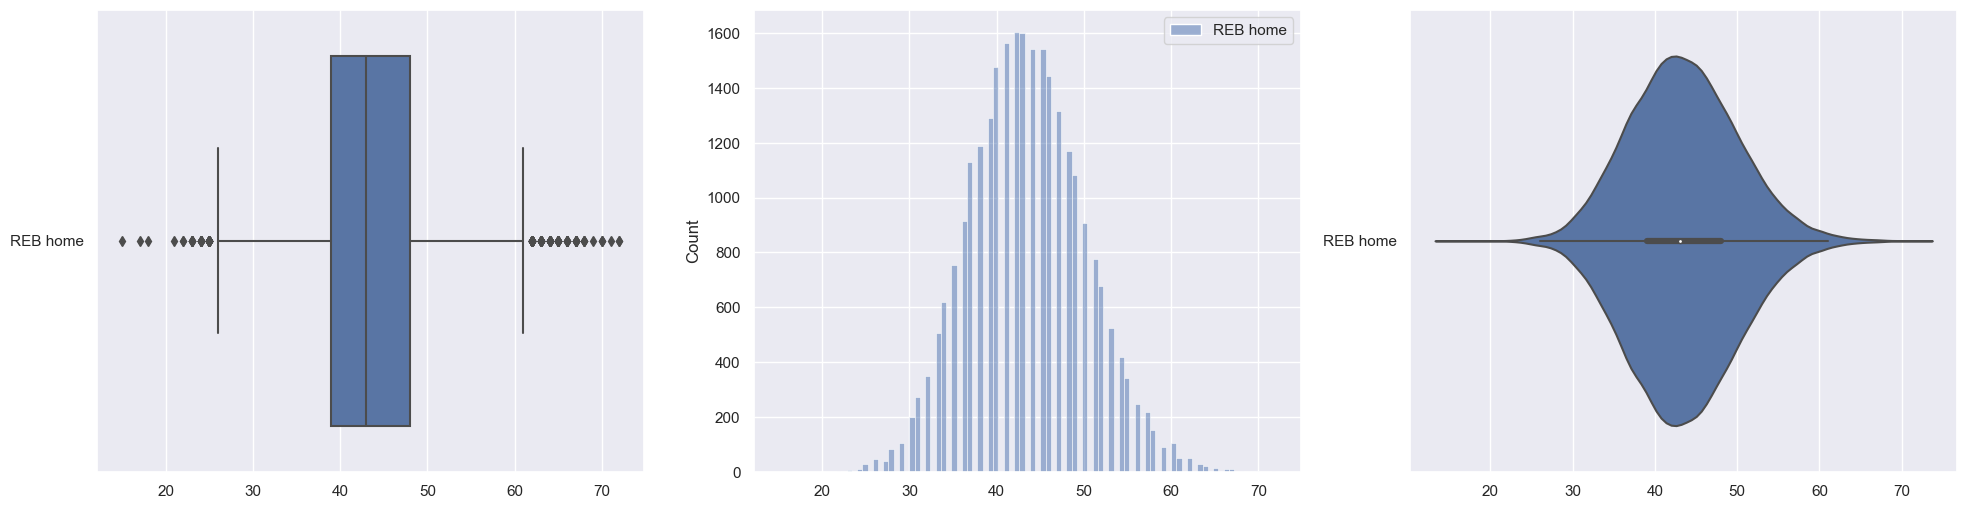

In [61]:
# Plot the distributions of reb_count
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data = reb_count, orient = "h", ax = axes[0])
sns.histplot(data = reb_count, ax = axes[1])
sns.violinplot(data = reb_count, orient = "h", ax = axes[2])

Inputs/ analysis for which variable seems better

## Classification tree fitting

In [98]:
X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.DataFrame
y_test: pd.DataFrame
X_train, X_test, y_train, y_test = train_test_split(newDF1["FG PCT home"].to_frame(), newDF1["HOME TEAM WINS"].to_frame(), test_size = 0.25)

dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'FG PCT home <= 0.465\ngini = 0.484\nsamples = 19914\nvalue = [8161, 11753]\nclass = Win'),
 Text(0.25, 0.7, 'FG PCT home <= 0.406\ngini = 0.488\nsamples = 10748\nvalue = [6222, 4526]\nclass = Lost'),
 Text(0.125, 0.5, 'FG PCT home <= 0.378\ngini = 0.377\nsamples = 3390\nvalue = [2536, 854]\nclass = Lost'),
 Text(0.0625, 0.3, 'FG PCT home <= 0.352\ngini = 0.3\nsamples = 1430\nvalue = [1167, 263]\nclass = Lost'),
 Text(0.03125, 0.1, 'gini = 0.227\nsamples = 506\nvalue = [440, 66]\nclass = Lost'),
 Text(0.09375, 0.1, 'gini = 0.335\nsamples = 924\nvalue = [727, 197]\nclass = Lost'),
 Text(0.1875, 0.3, 'FG PCT home <= 0.385\ngini = 0.421\nsamples = 1960\nvalue = [1369, 591]\nclass = Lost'),
 Text(0.15625, 0.1, 'gini = 0.401\nsamples = 393\nvalue = [284, 109]\nclass = Lost'),
 Text(0.21875, 0.1, 'gini = 0.426\nsamples = 1567\nvalue = [1085, 482]\nclass = Lost'),
 Text(0.375, 0.5, 'FG PCT home <= 0.443\ngini = 0.5\nsamples = 7358\nvalue = [3686, 3672]\nclass = Lost'),
 Text(0

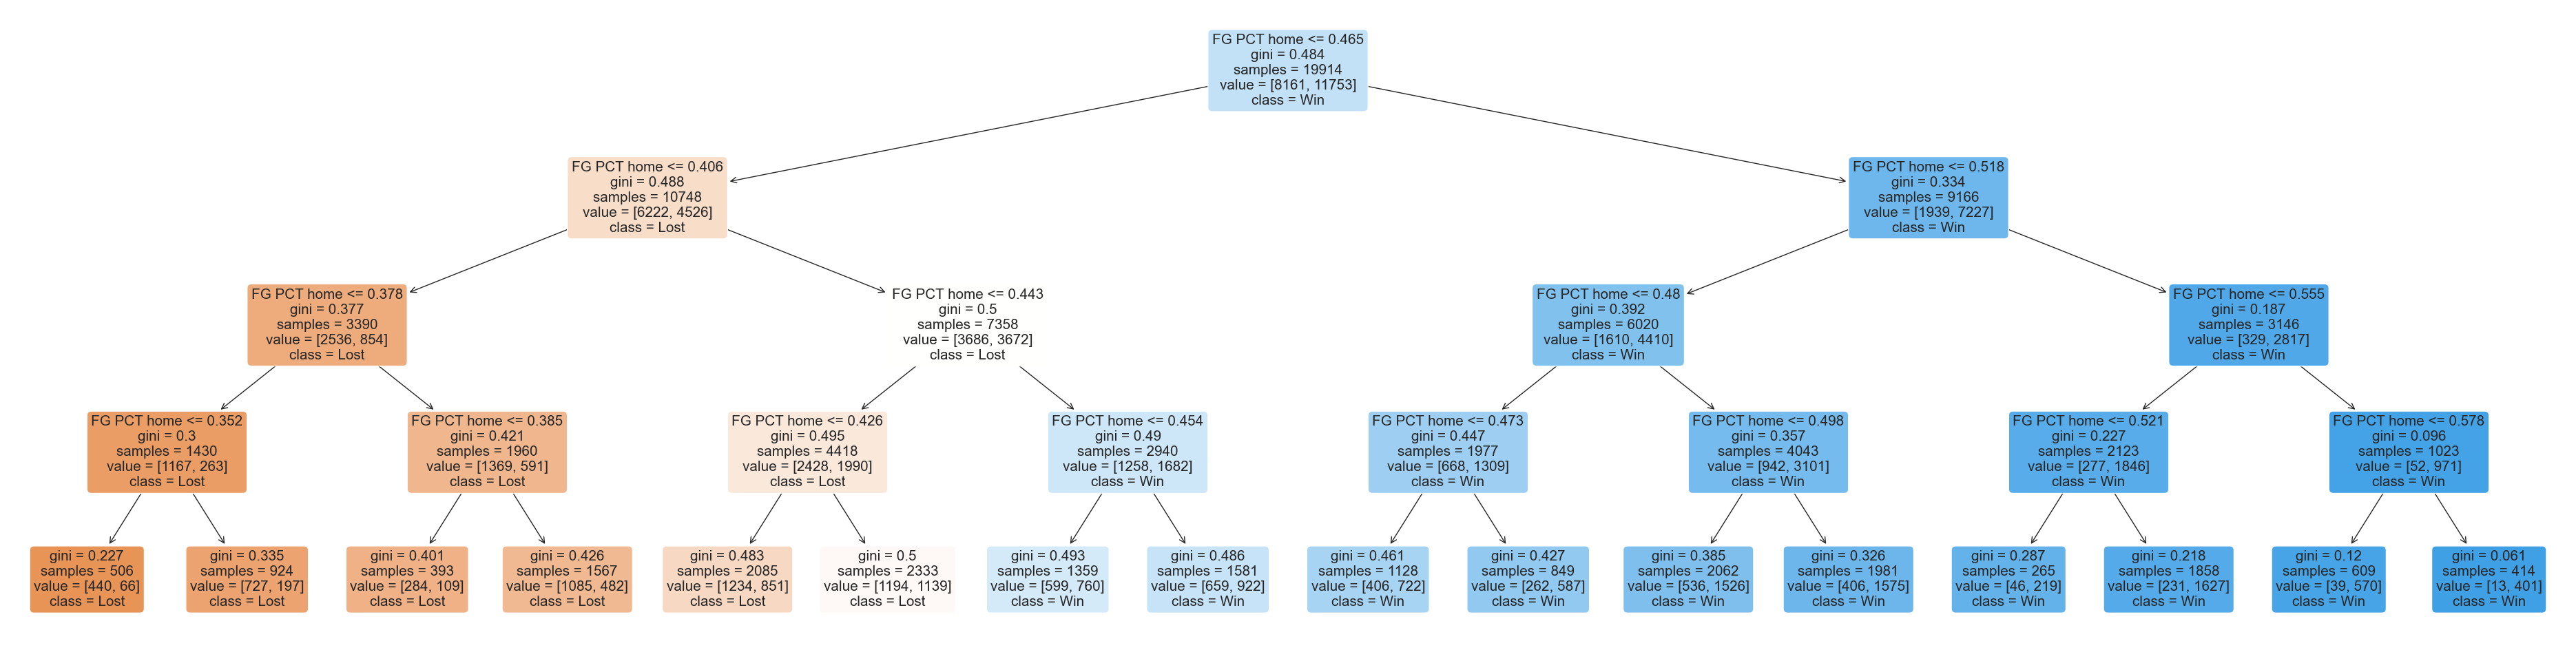

In [104]:
f = plt.figure(figsize=(48,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Lost","Win"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6966455759766998

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6881590840614643



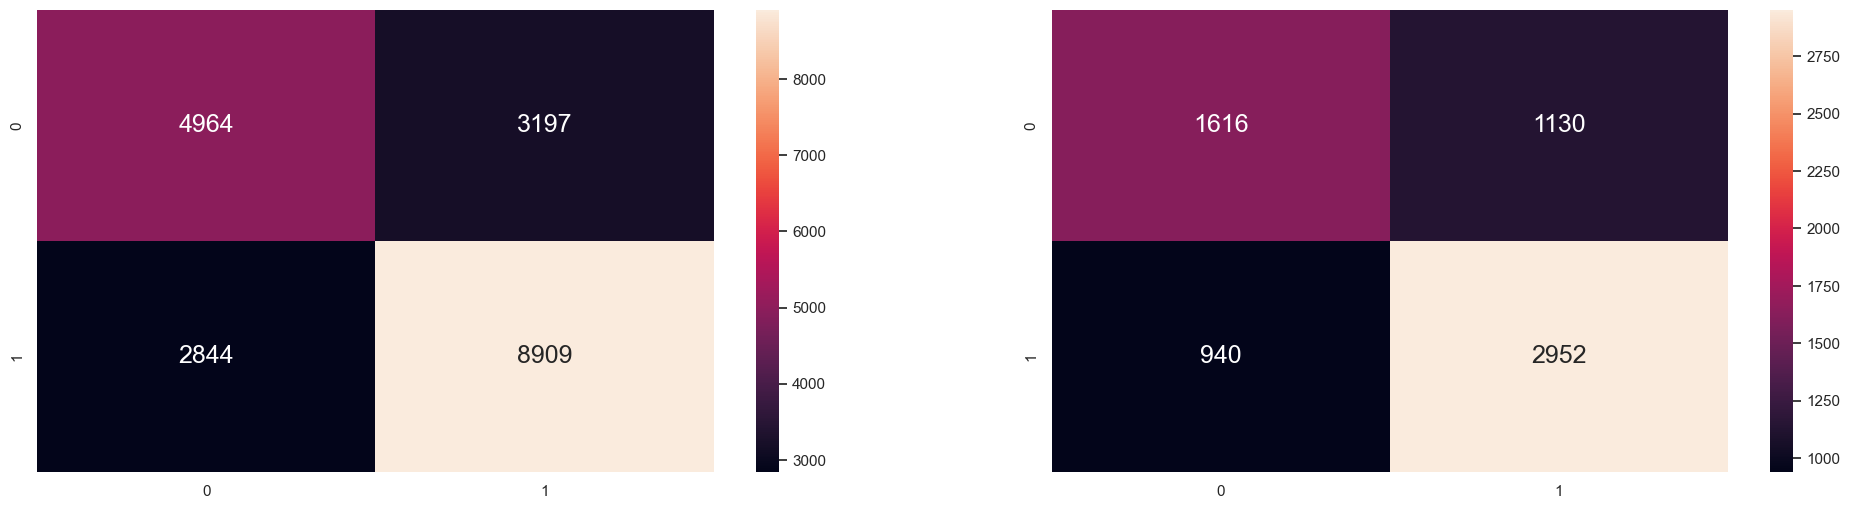

In [110]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()